In [402]:
with open('../../data/kaggle.json') as f:
  x = eval(f.read())

In [403]:
import os
# os.environ을 이용하여 Kaggle API Username, Key 세팅하기
# kaggle.json 파일 열어서 user명과 key값 확인
os.environ['KAGGLE_USERNAME'] = x['username']
os.environ['KAGGLE_KEY'] = x['key']

In [404]:
#!pip install kaggle --upgrade
#!pip install kaggle
#다음부터는 안넣어도 된다

In [405]:
!kaggle datasets download uciml/red-wine-quality-cortez-et-al-2009

red-wine-quality-cortez-et-al-2009.zip: Skipping, found more recently modified local copy (use --force to force download)


In [406]:
import os
 
def createFolder(directory):
    try:
        if not os.path.exists(directory):
            os.makedirs(directory)
    except OSError:
        print ('Error: Creating directory. ' +  directory)
 
createFolder('./zip')

In [407]:
#---------------------------------------------------------------------------------------
import zipfile
fantasy_zip = zipfile.ZipFile('red-wine-quality-cortez-et-al-2009.zip')
fileName=fantasy_zip.namelist()[0]
fantasy_zip.extract(fileName,'./zip')

#fantasy_zip.close()

'zip\\winequality-red.csv'

In [408]:
import pandas as pd

from glob import glob
data=pd.read_csv(glob('./zip/*.csv')[0])
data
# df=pd.read_csv('./zip/winequality-red.csv')

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


wine 데이터 셋
- fixed acidity(결합산) : 와인의 산도를 제어한다.(타르타르산+사과산)
- volatile acidity(휘발성산) : 와인향을 결정
- 휘발성 산도 : 높은 수준에서는 불쾌한 식초 맛을 초래할 수있는 와인의 아세트산의 양

- 구연산 : 소량으로 발견되는 경우 와인에 신선함과 맛을 추가하는 구연산 양.

- 잔류 설탕 : 와인 발효 후 잔류하는 설탕의 양, ex) 1g / L 미만의 와인은 드물며. 45g / L 이상의 와인은 단맛으로 여겨짐.

- 염화물 : 와인에 들어있는 소금의 양

- 자유 황산 : 미생물 성장과 포도주의 산화를 방지하는 황산 값.

- 총 이산화황 : 자유황산등으로 인해 때문에 생기는 이산화황, 저농도에서 SO2는 와인에서는 거의 검출되지 않지만, 50ppm 이상에서는 이산화황의 향과 맛이 느껴짐.

- 밀도 : 알코올과 설탕 퍼센트 함량으로 결정됨.

- pH : 와인의 산성,염기성 정도. 대부분의 와인은 pH 가늠자에 3-4 사이에서있다

- 황산염 : 와인 첨가제로서 항균 및 항산화 작용 수행

- 알코올 : 와인의 알콜 함량 퍼센트

- 품질출력 변수 (감각 데이터를 기반으로 0과 10 사이의 점수) -> 실제로는 red는 3~8 정수값만 가지고있음 -> 퍼센트대로 등급을 나누어서 분류 수행

In [409]:
#https://www.kaggle.com/egemenuurdalg/linear-regression
# 회귀분석
from statsmodels.api import add_constant # p-value, 회귀계수 확인
from sklearn.linear_model import LinearRegression # 회귀분석 모델
from sklearn.metrics import mean_squared_error #에러값
from sklearn.datasets import make_regression  # 리그레이션 가지고오는거
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split,cross_val_score # 데이터 나누기
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize # 정규화

SyntaxError: invalid syntax (<ipython-input-409-d11dcd3a09cf>, line 3)

In [ ]:
data.isnull().sum() #na값확인

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [ ]:
data.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
# x,y 데이터 분리
X = data.drop(['quality'], axis=1)
y = data.quality
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

In [ ]:
#훈련과 테스트이 x 열갯수는 같어야함
# 훈련테스트의 x,y 행갯수는 같아야함
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [ ]:
ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()
# pvalue 높은거 3개 빼야하나?

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                              8056.
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        13:22:40   Log-Likelihood:                         -1192.1
No. Observations:                1199   AIC:                                      2406.
Df Residuals:                    1188   BIC:                                      2462.
Df Model:                          11                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
fixed acidity            0.0032      0.019      0.167      0.868      -0.034       0.041
volatile acidity        -1.0221      0.140     -7.276      0.000      -1.298      -0.746
citric acid             -0.1352      0.173     -0.783      0.434      -0.474       0.204
residual sugar           0.0001      0.014      0.010      0.992      -0.027       0.028
chlorides               -1.7809      0.471     -3.778      0.000      -2.706      -0.856
free sulfur dioxide      0.0052      0.003      2.008      0.045       0.000       0.010
total sulfur dioxide    -0.0037      0.001     -4.364      0.000      -0.005      -0.002
density                  4.2080      0.724      5.809      0.000       2.787       5.629
pH                      -0.4428      0.186     -2.385      0.017      -0.807      -0.079
sulphates                0.7928      0.126      6.295      0.000       0.546       1.040
alcohol                  0.3050      0.020     14.944      0.000       0.265       0.345
==============================================================================
Omnibus:                       26.033   Durbin-Watson:                   1.998
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.079
Skew:                          -0.179   Prob(JB):                     7.29e-10
Kurtosis:                       3.845   Cond. No.                     2.44e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 2.44e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# pvalue 높은거 3개 뺀다
X.drop(['fixed acidity','citric acid','residual sugar'],axis=1,inplace=True)

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
#X_train=add_constant(X_train)
#X_test=add_constant(X_test)
# 상수항 결합, 변수의 영향력을 낮춘다 R제곱갑 낮아짐
ols_model=OLS(y_train,X_train)
results=ols_model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                quality   R-squared (uncentered):                   0.987
Model:                            OLS   Adj. R-squared (uncentered):              0.987
Method:                 Least Squares   F-statistic:                          1.110e+04
Date:                Fri, 24 Sep 2021   Prob (F-statistic):                        0.00
Time:                        13:22:40   Log-Likelihood:                         -1192.4
No. Observations:                1199   AIC:                                      2401.
Df Residuals:                    1191   BIC:                                      2442.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                                  
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
volatile acidity        -0.9593      0.117     -8.200      0.000      -1.189      -0.730
chlorides               -1.8737      0.445     -4.212      0.000      -2.746      -1.001
free sulfur dioxide      0.0056      0.003      2.200      0.028       0.001       0.011
total sulfur dioxide    -0.0039      0.001     -4.815      0.000      -0.005      -0.002
density                  4.0671      0.467      8.706      0.000       3.151       4.984
pH                      -0.3980      0.137     -2.913      0.004      -0.666      -0.130
sulphates                0.7895      0.125      6.294      0.000       0.543       1.036
alcohol                  0.3012      0.020     15.222      0.000       0.262       0.340
==============================================================================
Omnibus:                       26.495   Durbin-Watson:                   1.995
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               42.808
Skew:                          -0.183   Prob(JB):                     5.06e-10
Kurtosis:                       3.850   Cond. No.                     1.67e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 1.67e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
print(results.predict(X_test)[0:5]) #예측값은 소수점
print(y_test[0:5]) # 정수
#반올림 해야한다


803     5.327629
124     5.031292
350     5.638815
682     5.478258
1326    5.746314
dtype: float64
803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64


In [ ]:
def rounder(array): #반올림
    rounded_array=[]
    for i in array:
        rounded_array.append(int(i))
    return np.array(rounded_array)

In [ ]:
print(rounder(results.predict(X_test)[0:5])) #예측값은 반올림
print(y_test[0:5]) # 정수

[5 5 5 5 5]
803     6
124     5
350     6
682     5
1326    6
Name: quality, dtype: int64


In [ ]:
sub = (results.predict(X_test) - round(y_test,0))**2
np.sqrt(np.mean(sub))
# rmse 표현 다른변수들도 있어서 오차있음

0.6241720095645917

In [ ]:
ols_pred=results.predict(X_test)
rounded_pred_ols=rounder(ols_pred)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')
#비교 rmse는 낮을수록 좋다

The RMSE of sklearn model: 0.8215838362577492


In [ ]:
#선형회귀일때
lm=LinearRegression()
lm.fit(X_train,y_train)
print('Coefficients: ', np.round(lm.coef_,2)) # w값
print('Intercept: ', np.round(lm.intercept_,2)) #b값

Coefficients:  [-0.96 -1.89  0.01 -0.   -4.41 -0.42  0.8   0.29]
Intercept:  8.6


In [ ]:
preds=lm.predict(X_test)
rounded_pred_lm=rounder(preds)
print(f'The RMSE of sklearn model: {np.sqrt(mean_squared_error(y_test,rounded_pred_lm))}')

The RMSE of sklearn model: 0.8276472678623424


In [ ]:
### 다른방법으로 작업함
#https://www.kaggle.com/henriqueosinski/eda-and-multi-class-classification
# 멀티클래스 : 다항분류(레이블결고가 3개이상인 경우)
# 딥러닝에서 사진한장에서 여러개의 의미가 부여된 것을 멀티클래스라고 하기도함.
# ex_표정레이블, 성별레이블, 머리스타일 레이블 등등

In [ ]:
all = [var for var in globals() if var[0] != "_"]
for var in all:
    del globals()[var]

# 메모리 변수 제거

In [ ]:
import numpy as np 
import pandas as pd 
import plotly.express as px # 플로틀리
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from plotly.offline import init_notebook_mode, iplot # 플로틀리
init_notebook_mode(connected=True)

In [ ]:
from glob import glob
data=pd.read_csv(glob('./zip/*.csv')[0])
data
# df=pd.read_csv('./zip/winequality-red.csv')
df =data

In [ ]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [ ]:
px.histogram(df,x = 'quality')

In [ ]:
tmp = df[df.quality==5]
tmp.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.000000,681.0
mean,8.167254,0.577041,0.243686,2.528855,0.092736,16.983847,56.513950,0.997104,3.304949,0.620969,9.899706,5.0
std,1.563988,0.164801,0.180003,1.359753,0.053707,10.955446,36.993116,0.001589,0.150618,0.171062,0.736521,0.0
min,5.000000,0.180000,0.000000,1.200000,0.039000,3.000000,6.000000,0.992560,2.880000,0.370000,8.500000,5.0
25%,7.100000,0.460000,0.090000,1.900000,0.074000,9.000000,26.000000,0.996200,3.200000,0.530000,9.400000,5.0
50%,7.800000,0.580000,0.230000,2.200000,0.081000,15.000000,47.000000,0.997000,3.300000,0.580000,9.700000,5.0
75%,8.900000,0.670000,0.360000,2.600000,0.094000,23.000000,84.000000,0.997900,3.400000,0.660000,10.200000,5.0
max,15.900000,1.330000,0.790000,15.500000,0.611000,68.000000,155.000000,1.003150,3.740000,1.980000,14.900000,5.0


In [ ]:
# 열 추가
df['relative sulphur'] = df['free sulfur dioxide']/df['total sulfur dioxide']

In [ ]:
print([i for i in df.columns])
fig = px.imshow(df.corr())
fig.show()
px.scatter(df , x = 'alcohol', y = 'fixed acidity',color = 'quality')

['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality', 'relative sulphur']


In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

<BarContainer object of 1599 artists>

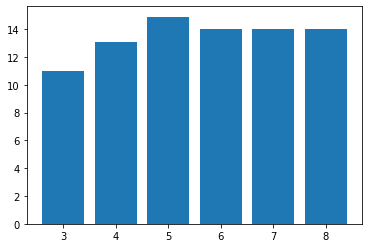

In [ ]:
plt.bar(df.quality, df.alcohol)

In [ ]:
n_neigh = len(np.unique(df['quality']))
y = df.pop('quality')

x = df.values

In [ ]:
type(x), type(y)

(numpy.ndarray, pandas.core.series.Series)

In [ ]:
from sklearn.preprocessing import StandardScaler #스케일링
SE = StandardScaler()
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state = 42)
SE.fit(x_train)
x_train = SE.transform(x_train)
x_test = SE.transform(x_test)

In [ ]:
model = KNeighborsClassifier(n_neighbors = n_neigh)
model.fit(x_train,y_train)
print(f'Average K neighbors precision {model.score(x_test,y_test)}')

Average K neighbors precision 0.59


In [ ]:
model2 = RandomForestClassifier(max_depth =30 , n_estimators = 200,random_state= 42)
model2.fit(x_train,y_train)
print(f'Average Random Forest precision {model2.score(x_test,y_test)}')

Average Random Forest precision 0.6725


              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        13
           5       0.62      0.76      0.68       164
           6       0.57      0.54      0.56       169
           7       0.57      0.42      0.48        48
           8       0.00      0.00      0.00         5

    accuracy                           0.59       400
   macro avg       0.29      0.29      0.29       400
weighted avg       0.57      0.59      0.57       400

[[  0   0   0   1   0   0]
 [  0   0   7   6   0   0]
 [  0   1 124  36   3   0]
 [  0   4  64  92   9   0]
 [  0   0   5  23  20   0]
 [  0   0   0   2   3   0]]


C:\Users\TH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\TH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.

C:\Users\TH\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



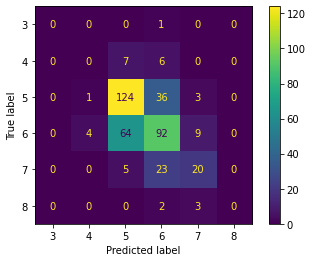

In [ ]:

prediction = model.predict(x_test)
print(classification_report(y_test,prediction))
print(confusion_matrix(y_test,prediction))
plot_confusion_matrix(model, x_test, y_test) 

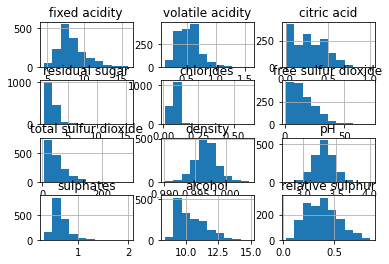

In [ ]:
df.hist()
plt.show()

In [410]:
# 다중공산성 제거해야함
#X = df.drop(['qualtiy'], axis=1)
#y = df['quality']

#트레이닝
# 테스트 데이터 분리
# 표준화시켜서
#회귀분석 rmse
# 로지스틱 회귀 rmse

In [442]:
from glob import glob
data=pd.read_csv(glob('./zip/*.csv')[0])
data
# df=pd.read_csv('./zip/winequality-red.csv')
df =data

In [ ]:
y = df['quality']
x = df.drop('quality',axis=1)

In [444]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state = 42)

In [445]:
from sklearn.preprocessing import StandardScaler #스케일링
sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [446]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((1199, 11), (400, 11), (1199,), (400,))

In [447]:
def rounder(array): #반올림
    rounded_array=[]
    for i in array:
        rounded_array.append(int(i))
    return np.array(rounded_array)

In [448]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error

l_model=LinearRegression()
l_model.fit(x_train_sc, y_train)
sub = (l_model.predict(x_test_sc)-round(y_test,0))**2
np.sqrt(np.mean(sub))
#{np.sqrt(mean_squared_error(rounded_pred_ols,y_test))}')
#np.sqrt(mean_squared_error(rounder(results.predict(x_test_sc)),y_test))

0.6231386191586041

In [452]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train_sc, y_train)
lr.predict(x_test_sc)
sub = (lr.predict(x_test_sc)-round(y_test,0))**2
np.sqrt(np.mean(sub))

0.6928203230275509

In [454]:
tmp = []
for x in df.quality:
    if x>6.5:
        tmp.append('good')
    else : 
        tmp.append('bad')
df['new_quality'] = tmp

In [465]:
df['new_quality'] = ['good' if x>6.5 else 'bad' for x in df['quality']]

In [477]:
from sklearn.preprocessing import LabelEncoder# new_quaity 문자열
label = LabelEncoder()
df['new_quality'] = label.fit_transform(df['new_quality'])
df.head() # bad 0 good 1

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,new_quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


In [478]:
df.new_quality.groupby(df['new_quality']).count()

new_quality
0    1382
1     217
Name: new_quality, dtype: int64

In [479]:
df.new_quality.value_counts()

0    1382
1     217
Name: new_quality, dtype: int64

In [480]:
y = df['new_quality']
x = df.drop(['new_quality','quality'],axis=1)

In [481]:
x_train,x_test, y_train, y_test = train_test_split(x,y,random_state = 42)

In [482]:
sc = StandardScaler()
sc.fit(x_train)
x_train_sc = sc.transform(x_train)
x_test_sc = sc.transform(x_test)

In [484]:
l_model=LinearRegression()
l_model.fit(x_train_sc, y_train)
sub = (l_model.predict(x_test_sc)-round(y_test,0))**2
np.sqrt(np.mean(sub))

0.2949139901225293

In [485]:
lr = LogisticRegression()
lr.fit(x_train_sc, y_train)
lr.predict(x_test_sc)
sub = (lr.predict(x_test_sc)-round(y_test,0))**2
np.sqrt(np.mean(sub))

0.35

In [490]:
from xgboost import XGBRegressor, plot_importance
from lightgbm import LGBMRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.linear_model import Ridge, Lasso, LinearRegression, ElasticNet
from sklearn.neighbors import KNeighborsRegressor

In [492]:
model_dict = {'xgb':XGBRegressor(n_estimators=110, learning_rate=0.05 ,max_depth=3, min_samples_split=400, random_state=23),
              'lgbm':LGBMRegressor(),
              'rf':RandomForestRegressor(),
              'svr':SVR(),
              'knn':KNeighborsRegressor(),
              'reg':LinearRegression(),
              'ridge':Ridge(),
              'lasso':Lasso()}

In [495]:
model = model_dict['ridge']

for x in model_dict:
    model = model_dict[x]